# 自己相関関数の実装

『足立修一．システム同定の基礎．東京電機大学出版局，2009，p.52』のグラフ（自己相関関数の部分のみ）をPythonコードで再現


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def calc_autocorrelation(signal, lag):
    """ 自己相関関数を求める
    """

    ret = np.empty(lag)
    signal_mean = np.mean(signal)

    for k in np.arange(0, lag): 
        if k == 0:
            # np.sum(signal[0:] * signal[:-0]) だとエラーになり意図通りの処理にならないので条件分けしている
            ret[k] = np.sum(signal**2)
        else:
            ret[k] = np.sum(signal[k:] * signal[:-k])
        ret[k] /= (signal.shape[0] - k)
    return ret

In [3]:
n_sample = 1024
interval = 0.001
time = np.arange(n_sample) * interval

LAG = 512

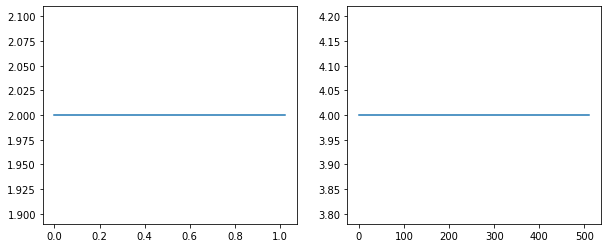

In [4]:
# x(t) = a の一定値波形（直流成分）の自己相関関数は、 r(t) = 2a と２倍の値の一定値波形になる
signal_2 = np.ones(n_sample)*2
corr_1 = calc_autocorrelation(signal_2, LAG)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(time, signal_2)
plt.subplot(1, 2, 2)
plt.plot(np.arange(LAG), corr_1)

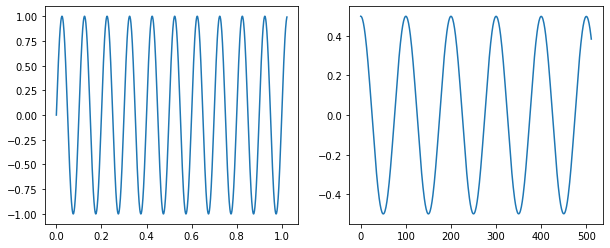

In [5]:
# x(t) = a*sin(w*t) の正弦波の自己相関関数は、 r(t) = (a**2)/2*cos(wt) となる
signal_1 = np.sin(2 * np.pi * time * 10)
corr_1 = calc_autocorrelation(signal_1, LAG)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(time, signal_1)
plt.subplot(1, 2, 2)
plt.plot(np.arange(LAG), corr_1)

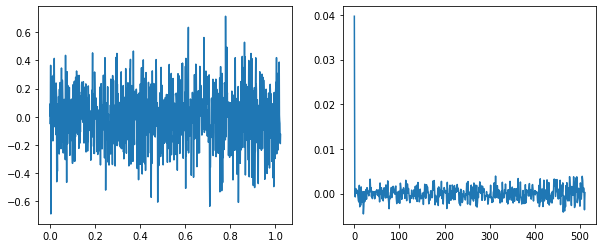

In [6]:
signal_2 = np.random.normal(0, 0.2, n_sample)
corr_1 = calc_autocorrelation(signal_2, LAG)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(time, signal_2)
plt.subplot(1, 2, 2)
plt.plot(np.arange(LAG), corr_1)